# 속성 데이터 분류 Template

# 데이터 준비

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
!wget https://raw.githubusercontent.com/dhrim/cau_2021/master/material/deep_learning/car_classification.csv

--2021-08-25 12:57:28--  https://raw.githubusercontent.com/dhrim/cau_2021/master/material/deep_learning/car_classification.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54766 (53K) [text/plain]
Saving to: ‘car_classification.csv’

car_classification. 100%[===================>]  53.48K  --.-KB/s    in 0.006s  

2021-08-25 12:57:28 (8.13 MB/s) - ‘car_classification.csv’ saved [54766/54766]



In [111]:
raw_data = pd.read_csv("car_classification.csv")
data = raw_data.to_numpy()
np.random.shuffle(data)

x = data[:,:7]
y = data[:,7]

split_index = int(len(x)*0.8)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

In [122]:
print(train_x[:5])
print(train_y[:5])

[[ 0.32723628 -0.86291079 -0.93088936 -1.51903418 -1.34516216  1.79736053
  -1.6232409 ]
 [-1.21023822  1.48205303  1.04724596  1.18288491  0.8175344  -1.4648516
  -0.80885042]
 [-0.95399247  0.30957112  0.53121066 -0.11611465  0.35367896  0.89119049
  -0.80885042]
 [-1.3383611   1.48205303  1.96464205  1.70248474  2.08195254 -1.2836176
  -1.35177741]
 [-1.46648397  1.48205303  1.96464205  1.62454476  2.27032023 -1.10238359
  -0.80885042]]
[1. 0. 0. 0. 0.]


In [121]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(313, 7)
(313,)
(79, 7)
(79,)


# Template

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 10)                80        
_________________________________________________________________
dense_82 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_83 (Dense)             (None, 3)                 33        
Total params: 223
Trainable params: 223
Non-trainable params: 0
_________________________________________________________________
3/3 [==============================] - 0s 4ms/step - loss: 0.5022 - acc: 0.8101
loss= 0.50220787525177
acc= 0.8101266026496887


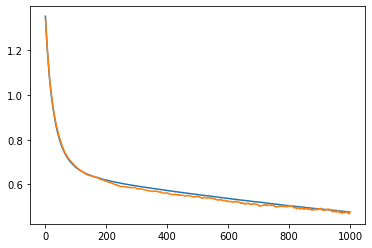

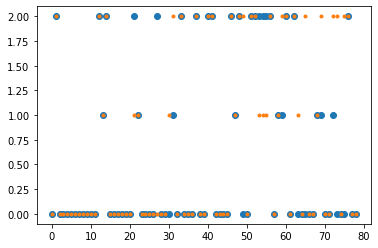

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(7,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(3, activation="softmax"))

model.compile(optimizer="SGD", loss="sparse_categorical_crossentropy", metrics=["acc"])
model.summary()

history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)



y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(test_y, "o")
plt.plot(predicted, ".")
plt.show()